<a href="https://colab.research.google.com/github/AditiCoderElite/Probability-Calculation-for-Gambling/blob/main/Probability_Calculation_for_Gambling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Probability Calculation For Gambling

---



#### Why Should You Never Gamble?

Suppose that you play a game in which you roll two standard 6-sided dice. You win INR 1500 if the sum of the numbers on the dice is 2 and lose INR 50 otherwise. How much do you expect to win on average per trial?

There are 36 possible outcomes of rolling two standard 6-sided dice. They are illustrated in the image shown below.

<img src='https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/two_dice_outcomes.png' width=600>

The sum of the numbers on the dice will be 2 if and only if the outcome is two $1s$, i.e., $\{1, 1\}$

So, let us define a random variable $X = x$ where $x$ some event. Let $x_1$ denotes that you win INR 1500 after rolling two dice. This is possible only if the outcome of rolling two dice is two $1s$, i.e., $\{1, 1\}$.

Similarly, let $x_2$ denotes that you lose INR 50 after rolling two dice. This is possible when the outcome is not two $1s$, i.e., $x_2 = \{1', 1'\}$

So, the probability of winning INR 1500 is  $P(X = x_1) = \frac{1}{36}$ because there is only one outcome out of 36 possible outcomes.

Hence, the probability of losing INR 50 is  $P(X = x_2) = \frac{35}{36}$ because there are 35 outcomes out of 36 possible outcomes in which the sum of the numbers on two dice is not 2.

So, your expected winnings after playing one game of rolling two dice are

$E(X) = x_1 p(x_1) + x_2 p(x_2) = 1500 \times \frac{1}{36} + (-50) \times \frac{35}{36}$




In [1]:
expected_winnings = 1500 / 36 - 50 * 35 / 36
expected_winnings

-6.94444444444445

So on an average per trial, you are likely to lose INR $6.945$ in this game. The negative sign denotes that you are likely to lose money. If you play this game say 100 times, then you are likely to lose INR $6.945 \times 100 = 694.5$ after 100 trials.

In general, for a game, if the probability of the favourable outcome(s) is very low, then you should **NOT** gamble on that game because it has been designed in such a way that on an average a player is likely to lose their money. The lotteries are specifically designed for people to lose their money on an average. Very rarely there is a jackpot winner.

---

#### Continuous Random Variable

The heights of people follow the **normal distribution**. If you create a histogram to plot the heights of 10,000 individuals, the arrangement of the bars in the histogram will appear to form a **bell shape**.


In [2]:
# NumPy array containing 10,000 random normally distributed numbers having a mean of 165 cm and a standard deviation.
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

height_mean = 165
height_std = 15
heights = np.random.normal(height_mean, height_std, size=10000)
heights[:10]

array([164.94224327, 166.08790847, 165.73129224, 129.59747064,
       173.39989956, 163.87132426, 175.95401223, 153.10674631,
       151.42549682, 162.5390211 ])

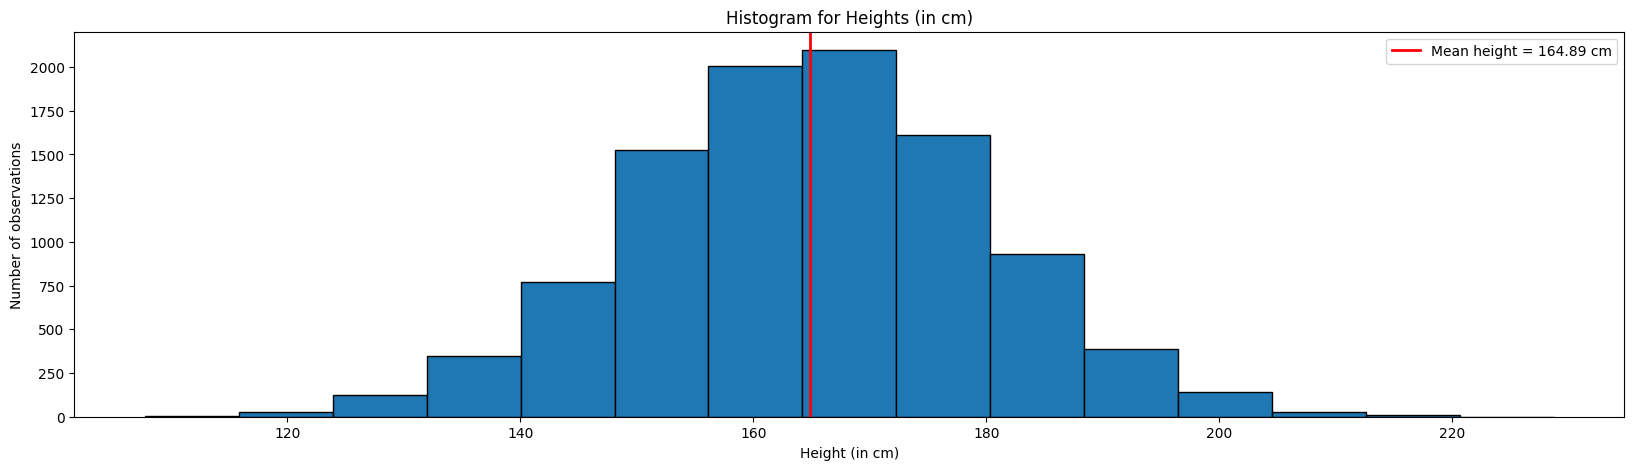

In [3]:
# Histogram for the heights.
plt.figure(figsize=(20, 5))
plt.title('Histogram for Heights (in cm)')
plt.hist(heights, bins='sturges', edgecolor='black')
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)
plt.xlabel('Height (in cm)')
plt.ylabel("Number of observations")
plt.legend()
plt.show()

<ipython-input-4-f39bf989a628>:4: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(heights, hist=False, bins='sturges')


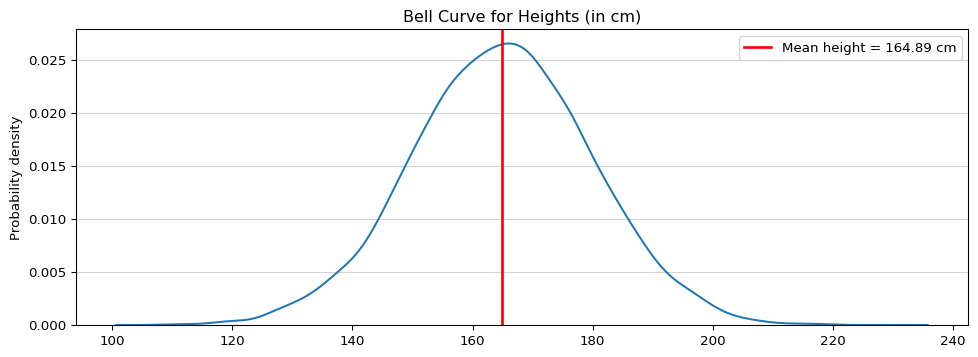

In [4]:
# Bell curve using the 'distplot()' function.
plt.figure(figsize=(12, 4), dpi=96)
plt.title("Bell Curve for Heights (in cm)")
sns.distplot(heights, hist=False, bins='sturges')
plt.axvline(np.mean(heights), color='red', label=f'Mean height = {np.mean(heights):.2f} cm', linewidth=2)
plt.ylabel("Probability density") # The 'y-axis' on the bell curve represent the probability density.
plt.legend()
plt.grid(which='major', axis='y', color='lightgrey')
plt.show()

Recall that

- Approx. $68 \%$ of the values lie between $\mu - \sigma$ and $\mu + \sigma$. In other words, approx. $68 \%$ of the values lie within **one-sigma** around the mean.

- Approx. $95 \%$ of the values lie between $\mu - 2 \sigma$ and $\mu + 2 \sigma$. In other words, approx. $95 \%$ of the values lie within **two-sigma** around the mean.

- Approx. $99.7 \%$ of the values lie between $\mu - 3 \sigma$ and $\mu + 3 \sigma$. In other words, approx. $99.7 \%$ of the values lie within **three-sigma** around the mean.

where $\mu$ and $\sigma$ are mean and standard deviation respectively.





---

#### Probability Density Function

To calculate the probability of a continuous random variable, we have to use the **Probability Density Function (PDF)**, i.e.,


$$\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$$

where,

- $\rho (x)$ which is read as **Rho** is dependent on the value of $x$ which is some arbitrary value of the random variable $X$

- $\sigma$ is the standard deviation of the sample. In this case, $\sigma$ is the standard deviation of the height values

- $\mu$ is the mean value of the sample. In this case, $\mu$ is the mean height

- $e = 2.71$ and $\pi = 3.14$



In [5]:
def prob_density_func(arr, mean, std):
  coeff = 1 / (std * np.sqrt(2 * np.pi))
  power_of_e = np.exp(-(arr - mean) ** 2 / (2 * std ** 2))
  prob = coeff * power_of_e
  return prob

In [6]:
sorted_heights = np.sort(heights)
prob_array = prob_density_func(sorted_heights, np.mean(heights), np.std(heights))
prob_array[:10]

array([1.85915568e-05, 3.75580609e-05, 4.26655464e-05, 5.13592980e-05,
       5.54756258e-05, 8.89149639e-05, 1.29190870e-04, 1.64279762e-04,
       1.79733757e-04, 1.83841362e-04])

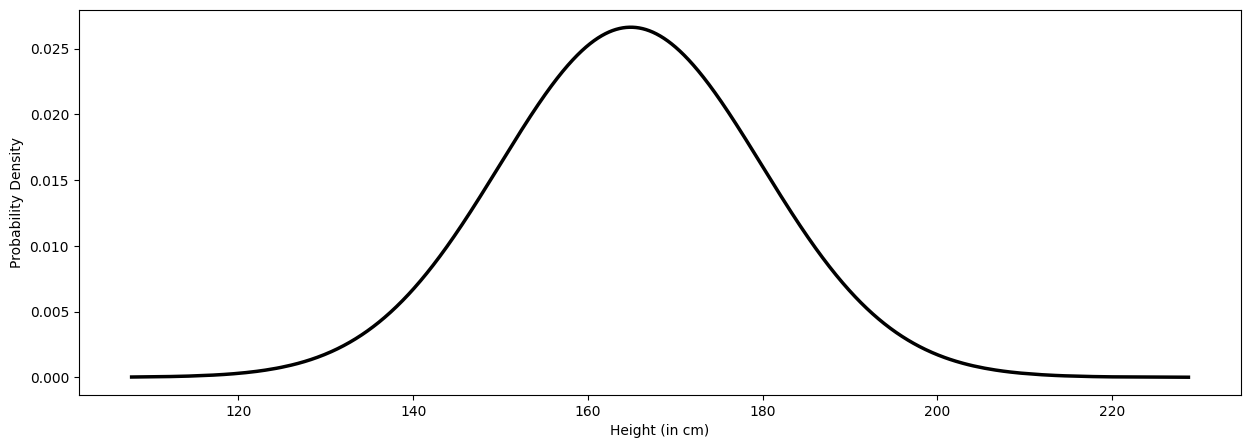

In [7]:
plt.figure(figsize=(15, 5))
plt.plot(sorted_heights, prob_array, color = 'black', linewidth = 2.5)

plt.xlabel("Height (in cm)")
plt.ylabel("Probability Density")
plt.show()

The above curve looks almost exactly like the bell curve we created using the `distplot()` function of the `seaborn` module. It is called a probability density curve or normal distribution or bell curve. Every point on the above curve can be represented using the probability density function, i.e., $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$

To calculate probabilities of a continuous random variable, we have to calculate the area of the region that lies below the curve. Hence, to find the probability of the random variable $150 \le X \le 180$, we need to calculate the area of the shaded region as shown in the image below.

<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/bell_curve.png" width=800>

The region in the above curve is enclosed between $X = 150, X = 180$ and $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$

To find the area of a region, we use integration. In this case, we need to find the area of the shaded region enclosed between $X = 150, X = 180$ and $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$.

Therefore, the expression to calculate the area of a region is given as

$$A = \int_{X = 150}^{X = 180} \rho(x) $$

In this case, the area represents the probability, so the above expression becomes

$$P(150 \le X \le 180) = \int_{150}^{180} \rho (x) dx$$

After substituting the values of $\mu$ and $\sigma$ in the PDF, we get

$$\Rightarrow \rho (x) = \frac{1}{15 \sqrt{2 \pi}}e^{-\frac{1}{450} (x - 165)^2}$$

Therefore

$$\Rightarrow P(150 \le X \le 180) = \int_{150}^{180} \frac{1}{15 \sqrt{2 \pi}}e^{-\frac{1}{450} (x - 165)^2} dx$$

If we can solve the above integration, we will get the probability of a person having a height between 150 cm and 180 cm.



In [8]:
from scipy import integrate

req_prob = integrate.quad(prob_density_func, 150, 180, args = (np.mean(heights), np.std(heights)))
req_prob

(0.6831992701667609, 7.585035601462408e-15)

The area of the curve enclosed between $X = 150, X = 180$ and $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$ is $0.68$ which is also the probability of a person having a height between 150 cm and 180 cm. In terms of percentage, the probability of a person having a height between 150 cm and 180 cm is $68 \%$ approx.



In [9]:
two_sigma = integrate.quad(prob_density_func, 135, 195, args = (np.mean(heights), np.std(heights)))
two_sigma

(0.9547268706212846, 1.8951510373834234e-11)

In [10]:
three_sigma = integrate.quad(prob_density_func, 120, 210, args = (np.mean(heights), np.std(heights)))
three_sigma

(0.9973280969381741, 1.1072566199526654e-14)

In [11]:
req_ans = integrate.quad(prob_density_func, 121, 147, args = (np.mean(heights), np.std(heights)))
req_ans

(0.11451746617419584, 1.2713992766832476e-15)

---

#### Fill Area Using the `fill_between()` Function



<img src = "https://student-datasets-bucket.s3.ap-south-1.amazonaws.com/images/bell_curve.png" width=800>



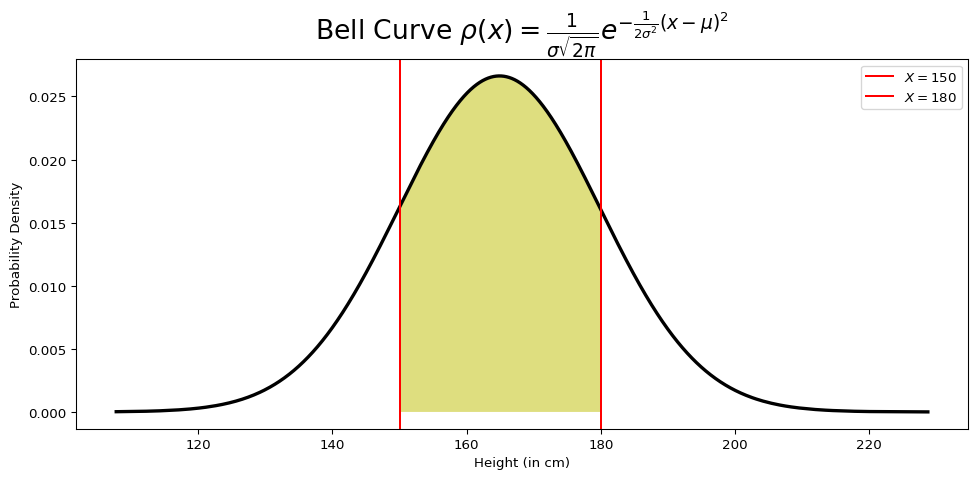

In [12]:
new_array = sorted_heights[(sorted_heights >= 150) & (sorted_heights <= 180)]
array_length = len(sorted_heights)

plt.figure(figsize=(12, 5), dpi = 96)
plt.title(label = r"Bell Curve $\rho(x) = \frac{1}{\sigma \sqrt{2 \pi}}e^{-\frac{1}{2\sigma^2}(x - \mu)^2}$", fontsize=20) # MathJaX equations
plt.plot(sorted_heights, prob_array, color = 'black', linewidth = 2.5)
plt.fill_between(x = new_array, y1 = prob_density_func(new_array, np.mean(heights), np.std(heights)),
                 facecolor = 'y', alpha = 0.5)
plt.axvline(x = 150, color = 'r', linestyle = '-', label = r"$X = 150$")
plt.axvline(x = 180, color = 'r', linestyle = '-', label = r"$X = 180$")
plt.xlabel("Height (in cm)")
plt.ylabel("Probability Density")
plt.legend()
plt.show()

---